In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

To plot coherence l1 norm (l1), relative entropy(S) and success probability(P) as a funciton of number of iteration(noi) taking the Grover's operator as G = DO

O = ( I-2|ψ⟩⟨ψ| ) and D = ( 2|ψ1⟩⟨ψ1|-I )

l1 norm of coherence is given by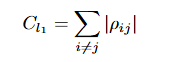

relative entropy is given by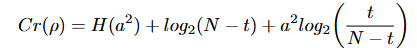 with 

   ;   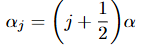   ;   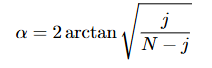   ;   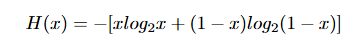   
Success probability is determined by the formula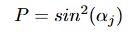
with t = number of target states and j = iteration number

In [12]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 3      #no. of target states
length = list(range(n))
noi = 15   #taking same number of iteration for all cases
noi_opt = math.floor(math.sqrt(N/t) * np.pi / 4)   #optimal No of iterations
print("noi = ", noi)
print("Optimal noi = ",noi_opt)

#to set target states by randomly generating them
target = np.zeros(t)    #to store target states
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of while loop
        if(count == t):
            break
print("target = ",target)

phi = [np.pi]    #setting at a particular value
print("phi = ",phi)

x = [complex(np.cos(a), np.sin(a)) for a in phi]
print("x = ",x)

#array to store coherence values after each suboperation in every grover's iteration
l1 = np.zeros(noi)    #to store l1 norm of coherence values after each iteration
S  = np.zeros(noi)    #to store relative entropy values after each iteration
P  = np.zeros(noi)    #to store success probability after each iteration
x_axis = list(range(noi))    #to store iteration number

noi =  15
Optimal noi =  7
target =  [148. 168.  84.]
phi =  [3.141592653589793]
x =  [(-1+1.2246467991473532e-16j)]


In [13]:
def iteration(i,a):
    qc.barrier()
    #count = i*2
    copy_i = i    #storing copy of iteration number
    copy_a = a    #storing copy of phi value
    
    #applying O operator
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    
    #Applying D operator
    qc.append(D_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied D operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    
    #calculating coherence by l1 norm
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    l1[copy_i] = coherence
    print("l1 norm = ",coherence)
    
    #calculating coherence by relative entropy
    j = copy_i+1   #to store the actual iteration number 
    alpha = 2*np.arctan(np.sqrt(t/(N-t)))
    alpha_j = (j+1/2.0)*alpha    
    a = np.sin(alpha_j)
    a_2 = a**2
    H = -(a_2*math.log2(a_2)+(1-a_2)*math.log2(1-a_2))
    Cr = H+math.log2(N-j)+a_2*math.log2(j/(N-j))
    S[copy_i] = Cr
    print("relative entropy = ",Cr)
    
    #calculating success probability
    P[copy_i] = np.sin(alpha_j)**2
    
for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            
   
    #defining D operator
    D_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i == j):    #for diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]-1
            else:          #for off-diagonal elements
                D_operator.data[i][j] = 2*density_operator.data[i][j]
    
    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i,a)    #a takes angle phi and i takes noi

======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  243.140625
l1 norm =  243.140625
relative entropy =  7.653268201167439
-------- 2  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  209.76007461547854
l1 norm =  209.76007461547854
relative entropy =  6.963193836255053
-------- 3  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  161.04385610762984
l1 norm =  161.04385610762984
relative entropy =  5.949163551385695
-------- 4  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  106.01921797449192
l1 norm =  106.01921797449192
relative entropy =  4.773204412573565
-------- 5  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  54.88237611985773
l1 norm =  54.88237611985773
relative entropy =  3.6638009969176553
-------- 6  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  17.10912716683567
l1 norm =  17.10912716683567
relative entropy =  2.8947050286718063
-------- 7  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  5.878018975104173
l1 norm =  5.878018975104173
relative entropy =  2.8543541421479253
-------- 8  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  34.50131479432531
l1 norm =  34.50131479432531
relative entropy =  3.7365958577994878
-------- 9  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  80.2648699081961
l1 norm =  80.2648699081961
relative entropy =  4.991460340744405
-------- 10  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  134.68857241964906
l1 norm =  134.68857241964906
relative entropy =  6.253716411293047
-------- 11  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  187.6875614382425
l1 norm =  187.6875614382425
relative entropy =  7.255648966440992
-------- 12  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  229.44097937980172
l1 norm =  229.44097937980172
relative entropy =  7.841885518568643
-------- 13  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.21180372956897
l1 norm =  252.21180372956897
relative entropy =  7.9994232328900985
-------- 14  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.21180373030043
l1 norm =  252.21180373030043
relative entropy =  7.91906733004109
-------- 15  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

'applied D operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  251.78053847359854
l1 norm =  251.78053847359854
relative entropy =  7.99843632602507


l1 =  [0.94976806640625, 0.8193752914667131, 0.629077562920429, 0.4141375702128591, 0.21438428171819426, 0.06683252799545183, 0.022961011621500677, 0.13477076091533324, 0.31353464807889103, 0.5261272360142542, 0.7331545368681348, 0.8962538257023505, 0.9852023583186288, 0.9852023583214861, 0.9835177284124943]
S_N =  [0.029895578910810308, 0.0271999759228713, 0.02323892012260037, 0.01864532973661549, 0.01431172264420959, 0.011307441518249244, 0.011149820867765333, 0.014596077569529249, 0.019497891956032833, 0.024428579731613463, 0.028342378775160125, 0.03063236530690876, 0.031247747003476947, 0.030933856757973006, 0.03124389189853543]
P =  [1.02198601e-01 2.66392139e-01 4.73873852e-01 6.86196812e-01
 8.64016993e-01 9.74383831e-01 9.96846047e-01 9.27241332e-01
 7.78467631e-01 5.78093115e-01 3.63247732e-01 1.73742918e-01
 4.46944338e-02 1.53155937e-05 4.79847266e-02]


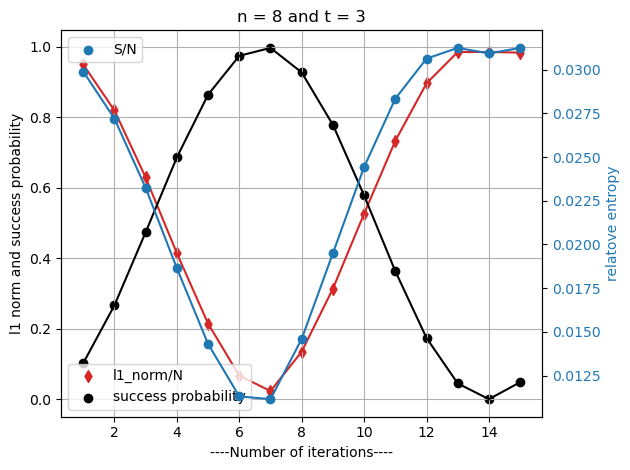

In [14]:
l1_N = [a/N for a in l1]
S_N  = [a/N for a in S]
xa   = [a+1 for a in x_axis]

print("l1 = ",l1_N)
print("S_N = ",S_N)
print("P = ",P)

fig, ax1 = pl.subplots()
pl.title("n = {} and t = {}".format(n, t))
color1 = 'tab:red'
color2 = 'black'
ax1.set_xlabel('----Number of iterations----')
ax1.scatter(xa, l1_N, marker='d', color=color1, label='l1_norm/N')
ax1.plot(xa, l1_N, color=color1)
ax1.scatter(xa, P, color=color2, label='success probability')
ax1.plot(xa, P, color=color2)
pl.legend()
ax1.set_ylabel("l1 norm and success probability")
pl.grid(True)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.scatter(xa, S_N, color=color, label='S/N')
ax2.plot(xa, S_N, color=color)
pl.legend()
ax2.set_ylabel('relatove entropy', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
#pl.grid(True)
pl.show()